In [0]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading the dataset :

In [0]:
digit_dataset = keras.datasets.mnist

In [0]:
(x_train, y_train), (x_test, y_test) = digit_dataset.load_data()

In [16]:
x_train.shape

(60000, 28, 28)

In [17]:
x_test.shape

(10000, 28, 28)

In [0]:
x_train_new = x_train.reshape(60000, 28, 28, 1)

In [0]:
x_test_new = x_test.reshape(10000, 28, 28, 1)

Normalizing the dataset

In [0]:
x_train_new = x_train_new/255.0
x_test_new = x_test_new/255.0

Visualising the data

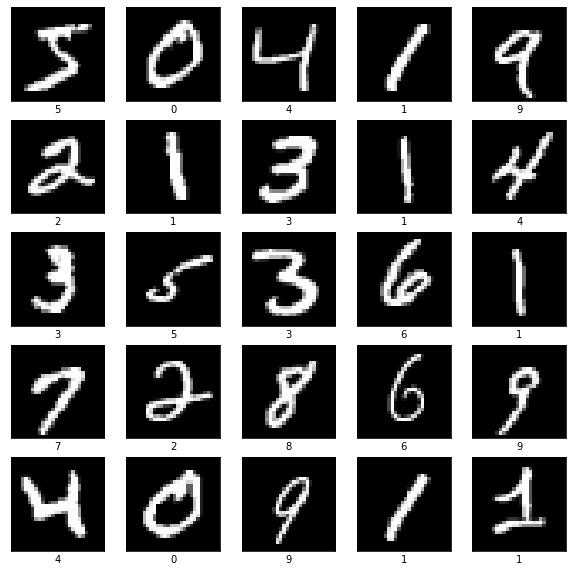

In [21]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap="gray")
    plt.xlabel(class_names[y_train[i]])
plt.show()

Defining the model

In [0]:
def create_model():
  model = keras.Sequential(
    [
     keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
     keras.layers.MaxPooling2D(2, 2), 
     keras.layers.Conv2D(64, (3,3), activation='relu'), 
     keras.layers.MaxPooling2D(2, 2),
     keras.layers.Flatten(),
     keras.layers.Dense(128, kernel_regularizer = keras.regularizers.l2(0.0001), activation = 'relu'),
     keras.layers.Dense(128, kernel_regularizer = keras.regularizers.l2(0.0001), activation = 'relu'),
     keras.layers.Dense(10, activation='softmax')
    ]
    )
  model.compile(optimizer = 'adam', 
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])
  return model
  

In [0]:
digit_recognition_model = create_model()

Training the model

In [24]:
digit_recognition_model.fit(x_train_new, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 80s 42ms/step - loss: 1.5604 - accuracy: 0.9261
Epoch 2/10
1875/1875 [==============================] - 80s 43ms/step - loss: 1.5076 - accuracy: 0.9742
Epoch 3/10
1875/1875 [==============================] - 80s 42ms/step - loss: 1.4997 - accuracy: 0.9805
Epoch 4/10
1875/1875 [==============================] - 79s 42ms/step - loss: 1.4963 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 80s 43ms/step - loss: 1.4935 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 80s 43ms/step - loss: 1.4893 - accuracy: 0.9865
Epoch 7/10
1875/1875 [==============================] - 79s 42ms/step - loss: 1.4882 - accuracy: 0.9869
Epoch 8/10
1875/1875 [==============================] - 79s 42ms/step - loss: 1.4864 - accuracy: 0.9876
Epoch 9/10
1875/1875 [==============================] - 80s 42ms/step - loss: 1.4845 - accuracy: 0.9885
Epoch 10/10
1875/1875 [==============================] - 79s 42m

Evaluating the model

In [26]:
test_loss, test_accuracy = digit_recognition_model.evaluate(x_test_new, y_test, verbose = 2)
print("Loss :",test_loss)
print("Accuracy :", test_accuracy)

313/313 - 3s - loss: 1.4836 - accuracy: 0.9885
Loss : 1.483565092086792
Accuracy : 0.9884999990463257


In [0]:
predictions = digit_recognition_model.predict(x_test_new)

Predicting a single image

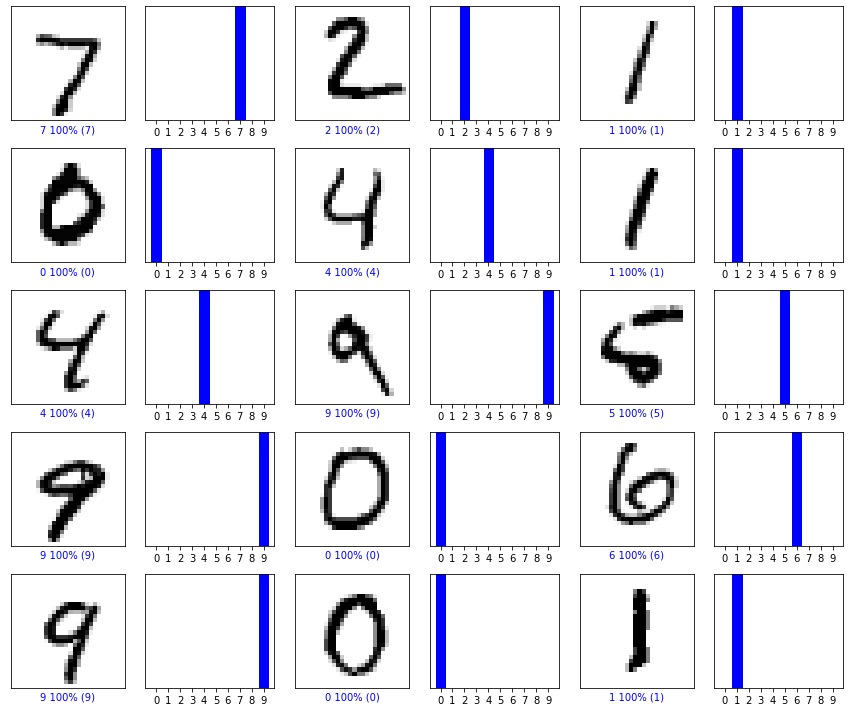

In [28]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()